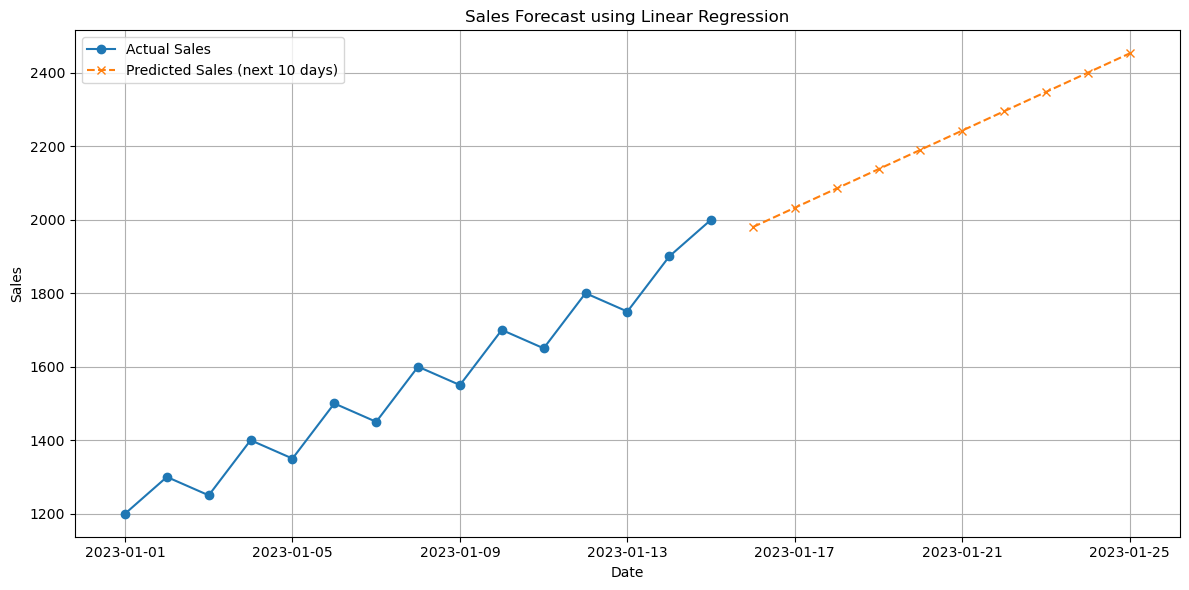

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Load the sample CSV
df = pd.read_csv("sales_data.csv")

# 2. Convert date column to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# 3. Feature engineering – convert date to numeric days
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

# 4. Train Linear Regression model
X = df[['Days']]
y = df['Sales']
model = LinearRegression()
model.fit(X, y)

# 5. Predict next 10 days
last_day = df['Days'].max()
future_days = pd.DataFrame({'Days': np.arange(last_day + 1, last_day + 11)})
future_sales = model.predict(future_days)

# 6. Generate future dates
future_dates = df['Date'].max() + pd.to_timedelta(future_days['Days'] - last_day, unit='d')

# 7. Plot results
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Sales'], label="Actual Sales", marker='o')
plt.plot(future_dates, future_sales, label="Predicted Sales (next 10 days)", linestyle='--', marker='x')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast using Linear Regression")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
